In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as s
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Get data
**note:** we are taking only first 10000 rows of the dataset

In [104]:
data = pd.read_excel('storedata_total.xlsx')
data.head()
data = data[:10000]

c:\users\sassa\appdata\local\programs\python\python37\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   custid      9986 non-null   object        
 1   retained    10000 non-null  int64         
 2   created     9986 non-null   datetime64[ns]
 3   firstorder  9986 non-null   object        
 4   lastorder   9986 non-null   object        
 5   esent       10000 non-null  int64         
 6   eopenrate   10000 non-null  float64       
 7   eclickrate  10000 non-null  float64       
 8   avgorder    10000 non-null  float64       
 9   ordfreq     10000 non-null  float64       
 10  paperless   10000 non-null  int64         
 11  refill      10000 non-null  int64         
 12  doorstep    10000 non-null  int64         
 13  favday      10000 non-null  object        
 14  city        10000 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(5), object(5)
memory usage: 1.1

In [106]:
data.describe()

,retained,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.721800,30.429400,18.205166,3.076820,72.940656,0.043420,0.283100,0.036900,0.019600
std,0.448135,19.762684,26.380037,6.992971,51.773417,0.100160,0.450527,0.188526,0.138628
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,10.000000,0.000000,0.000000,49.877500,0.000000,0.000000,0.000000,0.000000
50%,1.000000,40.000000,5.128205,0.000000,61.220000,0.011672,0.000000,0.000000,0.000000
75%,1.000000,45.000000,25.925926,2.941176,89.362500,0.054292,1.000000,0.000000,0.000000
max,1.000000,279.000000,100.000000,100.000000,2600.140000,2.142857,1.000000,1.000000,1.000000


# cleaning the dataset
removing rows that contain null values because 14 is very low number compared to 10000.

In [107]:
data.isnull().sum()

custid        14
retained       0
created       14
firstorder    14
lastorder     14
esent          0
eopenrate      0
eclickrate     0
avgorder       0
ordfreq        0
paperless      0
refill         0
doorstep       0
favday         0
city           0
dtype: int64

In [108]:
data.dropna(subset=['custid'], inplace=True)

In [109]:
data.isnull().sum()

custid        0
retained      0
created       0
firstorder    0
lastorder     0
esent         0
eopenrate     0
eclickrate    0
avgorder      0
ordfreq       0
paperless     0
refill        0
doorstep      0
favday        0
city          0
dtype: int64

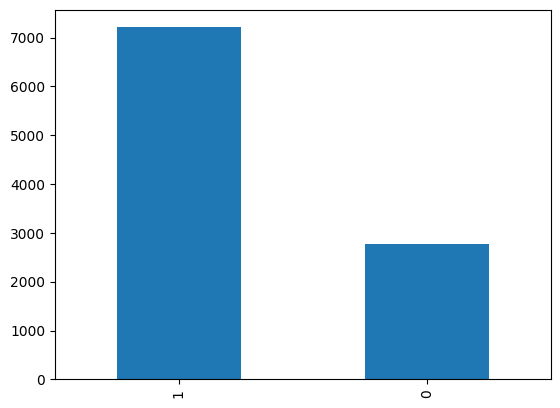

In [110]:
data.retained.value_counts().plot(kind='bar')
plt.show()

##### noticed that if the customer did not order even once, but account was created, then 1/0/00 is present in the data
##### replace firstorder column values with 1/0/00 with corresponding created values and lastorder with firstorder values

In [111]:
data.loc[data['firstorder'] == '1/0/00', 'firstorder'] = data['created']
data.loc[data['lastorder'] == '1/0/00', 'lastorder'] = data['firstorder']

# Removing outliers

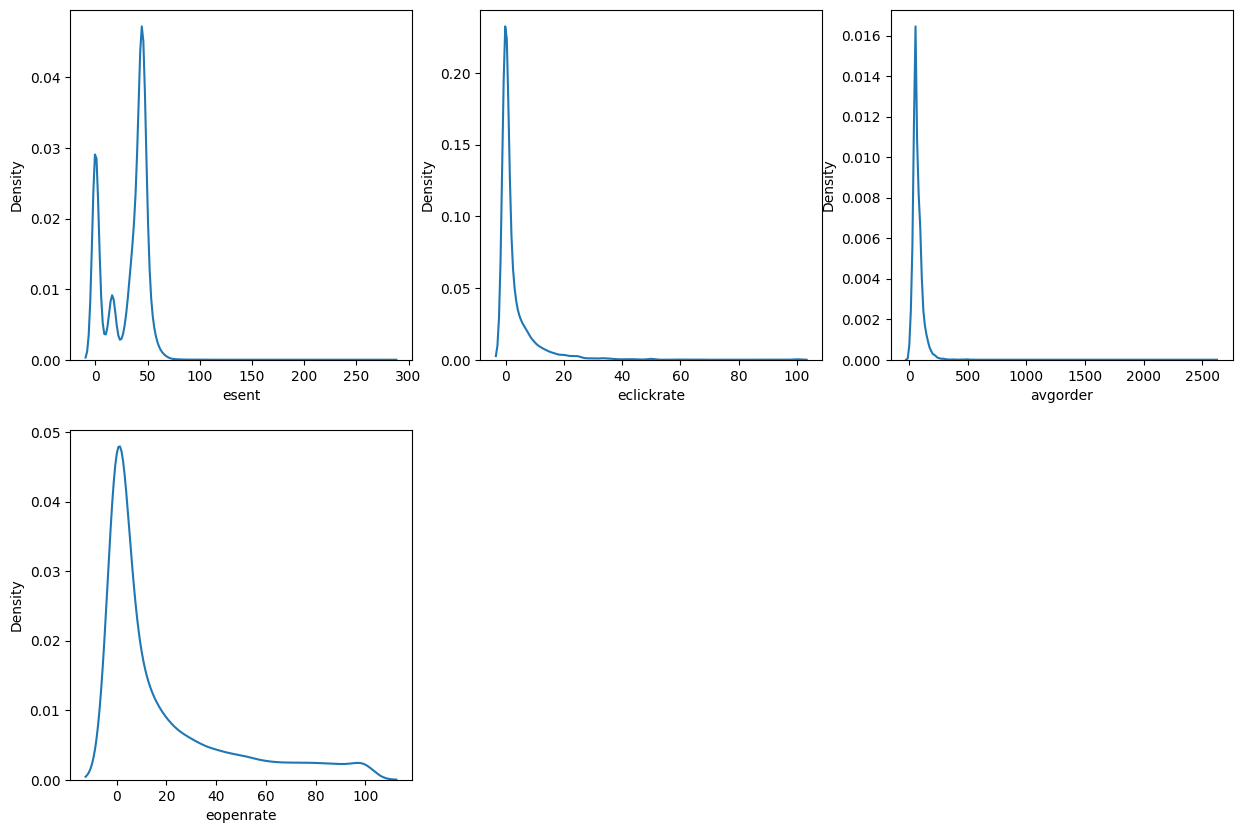

In [112]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.kdeplot(data.esent);
plt.subplot(2,3,2)
sns.kdeplot(data.eclickrate)
plt.subplot(2,3,3)
sns.kdeplot(data.avgorder)
plt.subplot(2,3,4)
sns.kdeplot(data.eopenrate)
plt.show()

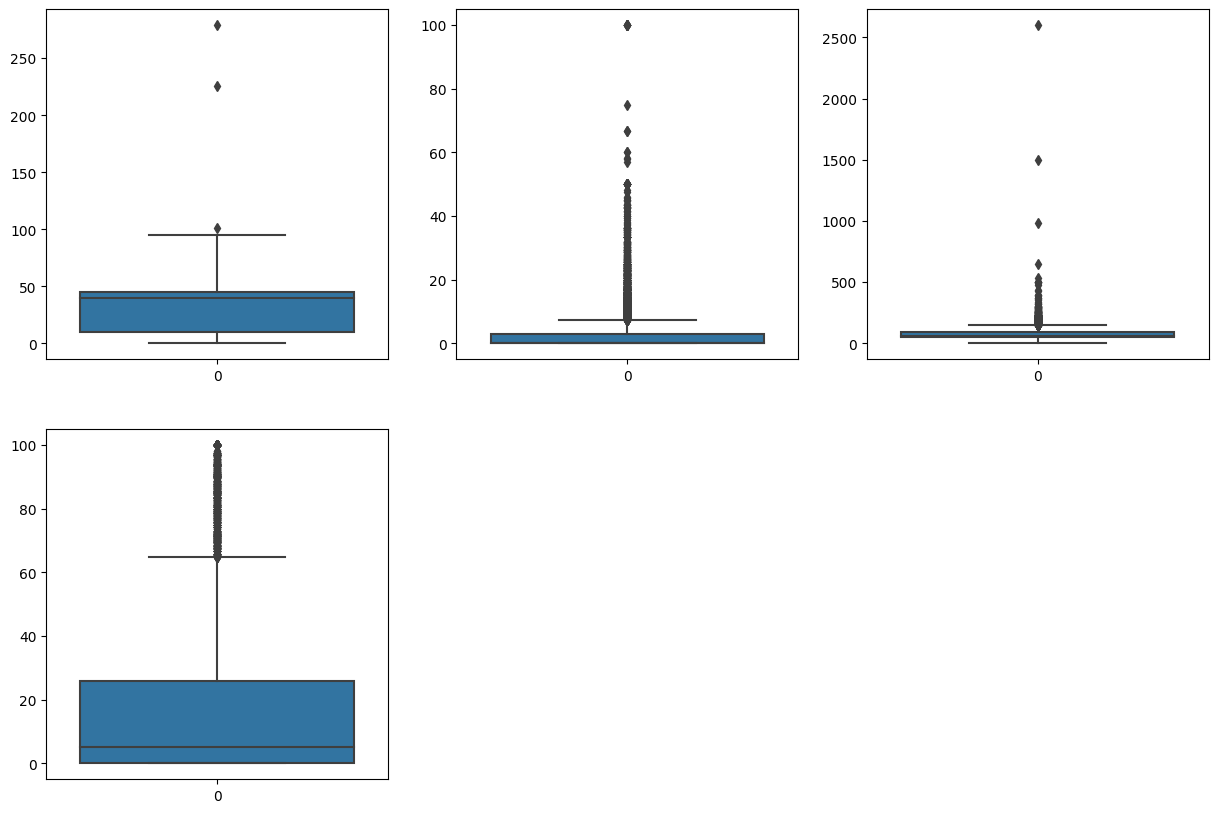

In [113]:
plt.figure(figsize=(15,10))

plt.subplot(2, 3, 1)
sns.boxplot(data.esent)

plt.subplot(2, 3, 2)
sns.boxplot(data.eclickrate)

plt.subplot(2, 3, 3)
sns.boxplot(data.avgorder)

plt.subplot(2, 3, 4)
sns.boxplot(data.eopenrate)

plt.show()

A value is taken for a outlier if it is greater than the 3rd qurtile + inter-quartile range or less than 1st quartile - inter-quartile range, and fill with median.

In [114]:
def remove(x):
    for i in x.columns:
        iqr = 1.5*(x[i].quantile(0.75)-x[i].quantile(0.25))
        ul = x[i].quantile(0.75)+iqr
        ll =x[i].quantile(0.25)-iqr
        temp = []
        for j in x[i].index:
            if x[i][j]>ul or x[i][j]<ll :
                temp.append(np.median(x[i]))
            else:
                temp.append(x[i][j])
        x[i]= temp
    return x

excluding columns which contains dates, address

In [115]:
data[['esent','eclickrate','avgorder','eopenrate']] = remove(data[['esent','eclickrate','avgorder','eopenrate']])

c:\users\sassa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":


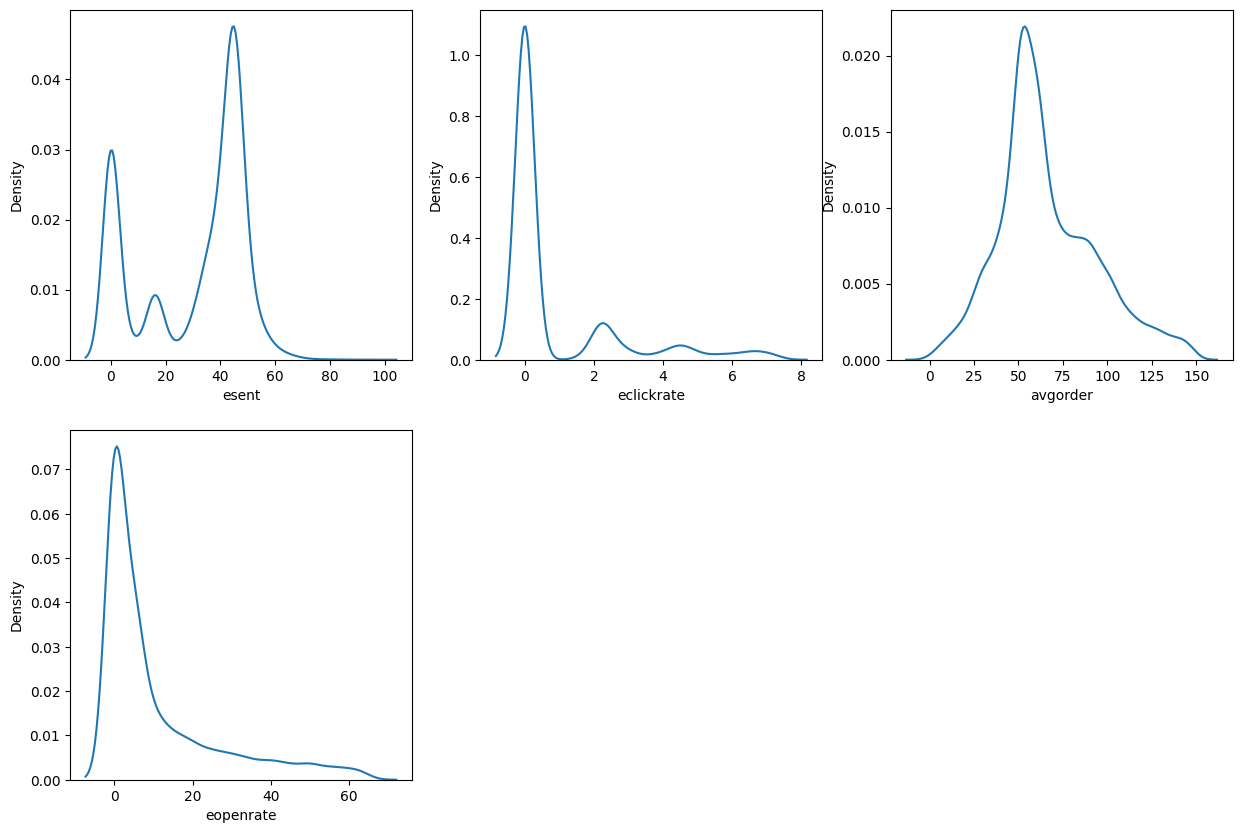

In [116]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.kdeplot(data.esent);
plt.subplot(2,3,2)
sns.kdeplot(data.eclickrate)
plt.subplot(2,3,3)
sns.kdeplot(data.avgorder)
plt.subplot(2,3,4)
sns.kdeplot(data.eopenrate)
plt.show()

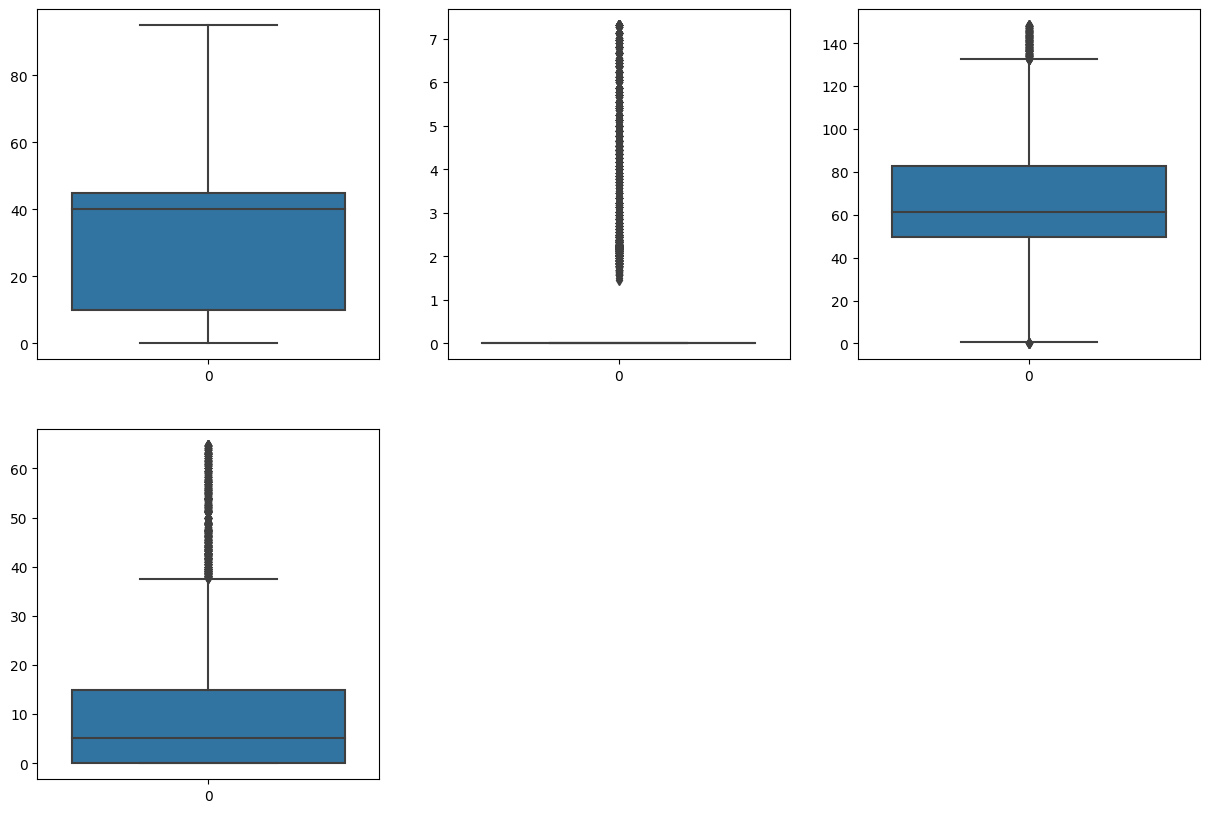

In [117]:
plt.figure(figsize=(15,10))

plt.subplot(2, 3, 1)
sns.boxplot(data.esent)

plt.subplot(2, 3, 2)
sns.boxplot(data.eclickrate)

plt.subplot(2, 3, 3)
sns.boxplot(data.avgorder)

plt.subplot(2, 3, 4)
sns.boxplot(data.eopenrate)

plt.show()

In [118]:
data.describe()

,retained,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep
count,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000
mean,0.721911,30.382135,10.801030,0.858630,65.787720,0.043481,0.282696,0.036852,0.019627
std,0.448080,19.495412,15.419978,1.764759,27.628895,0.100217,0.450332,0.188407,0.138723
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,10.000000,0.000000,0.000000,49.860000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,40.000000,5.139257,0.000000,61.210000,0.011754,0.000000,0.000000,0.000000
75%,1.000000,45.000000,15.000000,0.000000,82.910000,0.054443,1.000000,0.000000,0.000000
max,1.000000,95.000000,64.705882,7.317073,148.460000,2.142857,1.000000,1.000000,1.000000


# Visualization
favourite day

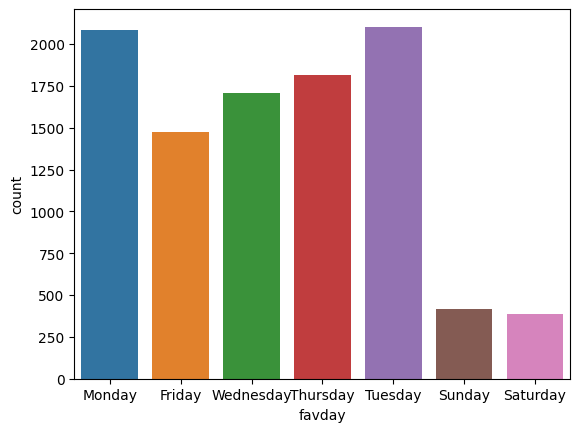

In [119]:
plt.figure()
sns.countplot(x = data.favday)
plt.show()

customers retained vs lost for each city

<AxesSubplot:xlabel='city'>

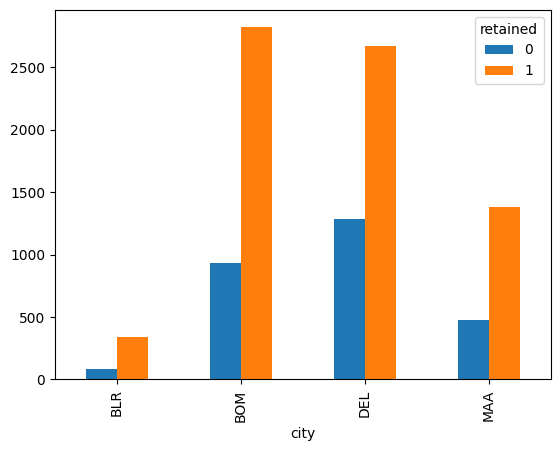

In [120]:
pd.crosstab(index=data.city,columns=data.retained).plot(kind='bar')

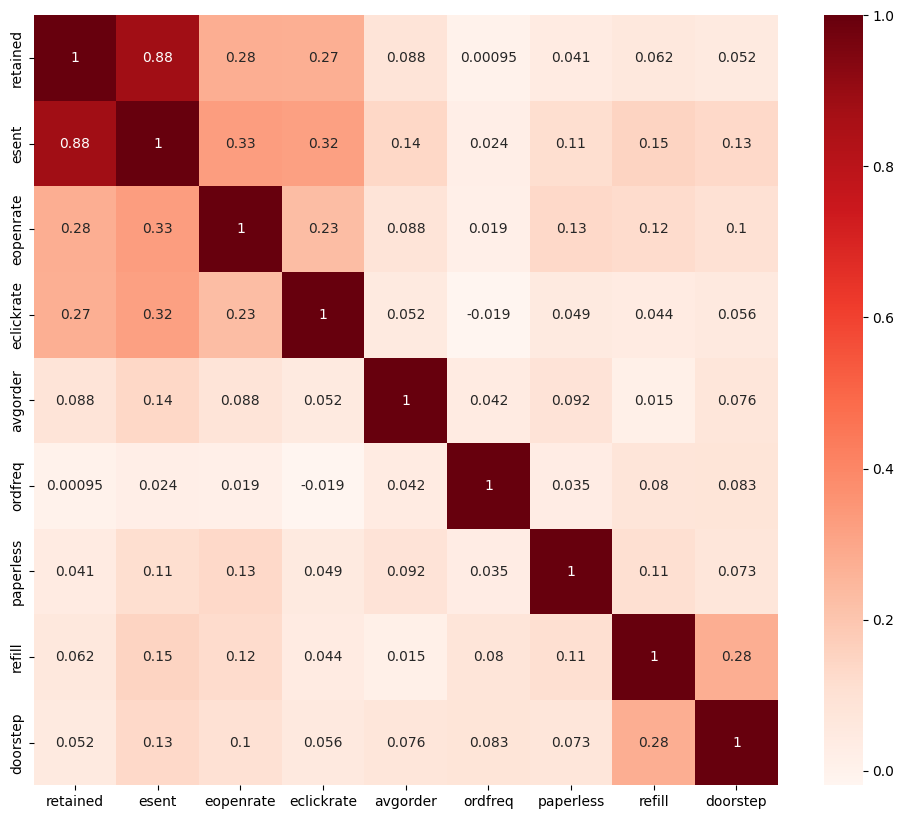

In [129]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

# Conclusion:
* As seen in the heatmap, **esent, eopenrate, eclickrate** are closely correlated to **retained**.
* As there are only 14 null values out of 10000, those rows were removed.
* Data is under represented, (i.e.,) there is more data for the retained part than for the non-retained part.
* A plot shows that only small number of people are ordering more on weekends, compared to weekdays (from favdays plot).
* A plot shows that Bombay has high retention rate compared to other cities.

# Encoding
- removing columns such as custid, created, firstorder, lastorder.
- one hot encoding using getdummies function.
- splitting the data into train and test with 80-20 split.

In [121]:
ndata = data.drop(['retained','custid','created','firstorder','lastorder'],axis=1)

In [122]:
ndata = pd.concat([ndata, pd.get_dummies(ndata[['favday','city']])],axis=1)
ndata = ndata.drop(columns=['city','favday'],axis=1)
ndata.head()

,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday_Friday,favday_Monday,favday_Saturday,favday_Sunday,favday_Thursday,favday_Tuesday,favday_Wednesday,city_BLR,city_BOM,city_DEL,city_MAA
0,29.0,5.150309,3.448276,14.52,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,95.0,5.150309,0.000000,83.69,0.181641,1,1,1,1,0,0,0,0,0,0,0,0,1,0
2,0.0,0.000000,0.000000,33.58,0.059908,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0.0,0.000000,0.000000,54.96,0.000000,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,30.0,5.150309,0.000000,111.91,0.008850,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [123]:
xtrain,xtest,ytrain,ytest = train_test_split(ndata,data.retained,test_size=0.2)

## k-NN with k=3.

In [124]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [125]:
model.score(xtest, ytest) 

0.982982982982983

## k-NN with k=5.

In [126]:
model1 = KNeighborsClassifier(n_neighbors=5)
model1.fit(xtrain,ytrain)

KNeighborsClassifier()

In [127]:
model1.score(xtest, ytest) 

0.982982982982983